In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
sales = pd.read_csv('data/sales_data.csv',
                   parse_dates = ['Date'])

In [4]:
sales.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [5]:
sales.shape

(113036, 18)

In [6]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Date              113036 non-null  datetime64[ns]
 1   Day               113036 non-null  int64         
 2   Month             113036 non-null  object        
 3   Year              113036 non-null  int64         
 4   Customer_Age      113036 non-null  int64         
 5   Age_Group         113036 non-null  object        
 6   Customer_Gender   113036 non-null  object        
 7   Country           113036 non-null  object        
 8   State             113036 non-null  object        
 9   Product_Category  113036 non-null  object        
 10  Sub_Category      113036 non-null  object        
 11  Product           113036 non-null  object        
 12  Order_Quantity    113036 non-null  int64         
 13  Unit_Cost         113036 non-null  int64         
 14  Unit

In [7]:
sales.describe()

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
count,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000
mean,15.665753,2014.401739,35.919212,11.901660,267.296366,452.938427,285.051665,469.318695,754.370360
std,8.781567,1.272510,11.021936,9.561857,549.835483,922.071219,453.887443,884.866118,1309.094674
min,1.000000,2011.000000,17.000000,1.000000,1.000000,2.000000,-30.000000,1.000000,2.000000
25%,8.000000,2013.000000,28.000000,2.000000,2.000000,5.000000,29.000000,28.000000,63.000000
50%,16.000000,2014.000000,35.000000,10.000000,9.000000,24.000000,101.000000,108.000000,223.000000
75%,23.000000,2016.000000,43.000000,20.000000,42.000000,70.000000,358.000000,432.000000,800.000000
max,31.000000,2016.000000,87.000000,32.000000,2171.000000,3578.000000,15096.000000,42978.000000,58074.000000


# Numerical analysis and visualization

In [8]:
sales['Unit_Cost'].describe()

count    113036.000000
mean        267.296366
std         549.835483
min           1.000000
25%           2.000000
50%           9.000000
75%          42.000000
max        2171.000000
Name: Unit_Cost, dtype: float64

In [9]:
sales['Unit_Cost'].mean()

267.296365759581

In [10]:
sales['Unit_Cost'].median()

9.0

<AxesSubplot:>

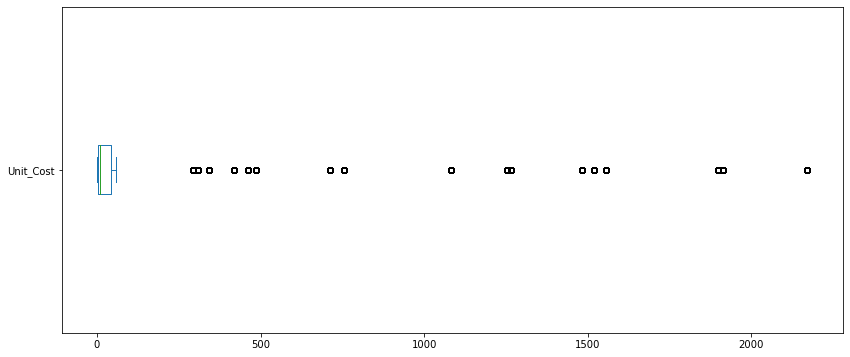

In [11]:
sales['Unit_Cost'].plot(kind = 'box', vert = False, figsize =(14,6))

from boxplot graph we can see that unit_cost around $500 is considered to be an outlier

<AxesSubplot:ylabel='Density'>

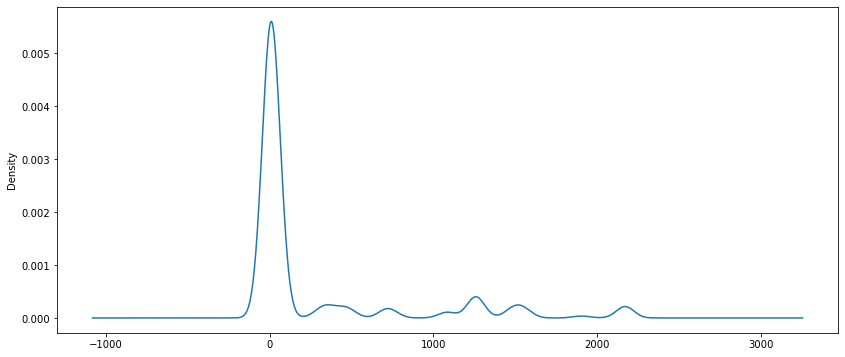

In [15]:
sales['Unit_Cost'].plot(kind = 'density', figsize=(14,6))

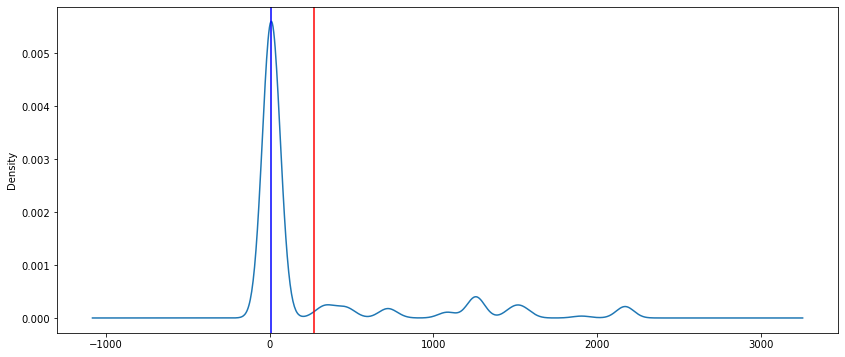

In [17]:
ax = sales['Unit_Cost'].plot(kind='density', figsize=(14,6))
ax.axvline(sales['Unit_Cost'].mean(), color = 'red')
ax.axvline(sales['Unit_Cost'].median(), color = 'blue')

Text(0.5, 0, 'Dollars')

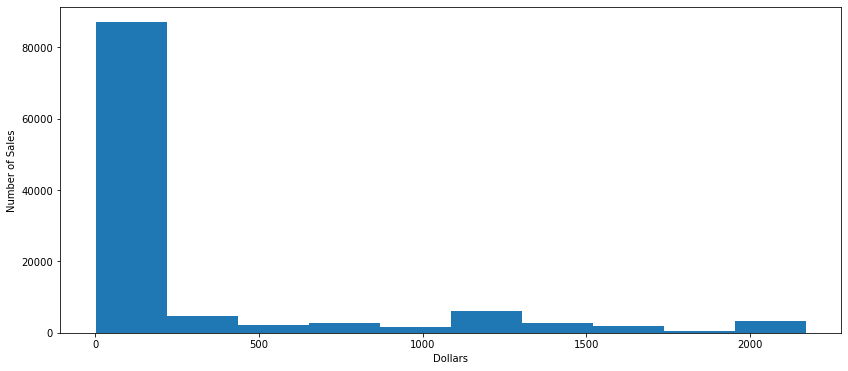

In [19]:
ax= sales['Unit_Cost'].plot(kind='hist', figsize=(14,6))
ax.set_ylabel('Number of Sales')
ax.set_xlabel('Dollars')

# Categorical analysis and visualization

In [20]:
sales.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [21]:
sales['Age_Group'].value_counts()

Adults (35-64)          55824
Young Adults (25-34)    38654
Youth (<25)             17828
Seniors (64+)             730
Name: Age_Group, dtype: int64

<AxesSubplot:ylabel='Age_Group'>

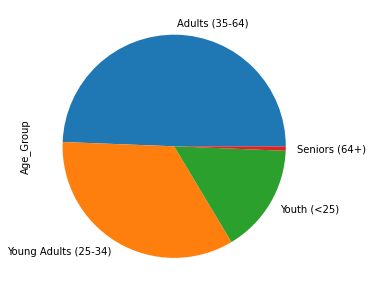

In [22]:
sales['Age_Group'].value_counts().plot(kind='pie', figsize=(5,6))

<AxesSubplot:>

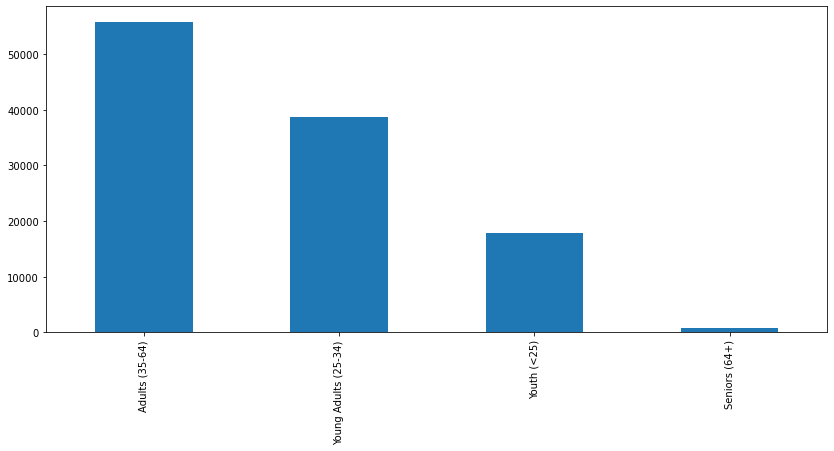

In [23]:
sales['Age_Group'].value_counts().plot(kind='bar', figsize=(14,6))

# Relationship between the columns

In [25]:
corr = sales.corr()
corr

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
Day,1.000000,-0.007635,-0.014296,-0.002412,0.003133,0.003207,0.004623,0.003329,0.003853
Year,-0.007635,1.000000,0.040994,0.123169,-0.217575,-0.213673,-0.181525,-0.215604,-0.208673
Customer_Age,-0.014296,0.040994,1.000000,0.026887,-0.021374,-0.020262,0.004319,-0.016013,-0.009326
Order_Quantity,-0.002412,0.123169,0.026887,1.000000,-0.515835,-0.515925,-0.238863,-0.340382,-0.312895
Unit_Cost,0.003133,-0.217575,-0.021374,-0.515835,1.000000,0.997894,0.741020,0.829869,0.817865
Unit_Price,0.003207,-0.213673,-0.020262,-0.515925,0.997894,1.000000,0.749870,0.826301,0.818522
Profit,0.004623,-0.181525,0.004319,-0.238863,0.741020,0.749870,1.000000,0.902233,0.956572
Cost,0.003329,-0.215604,-0.016013,-0.340382,0.829869,0.826301,0.902233,1.000000,0.988758
Revenue,0.003853,-0.208673,-0.009326,-0.312895,0.817865,0.818522,0.956572,0.988758,1.000000


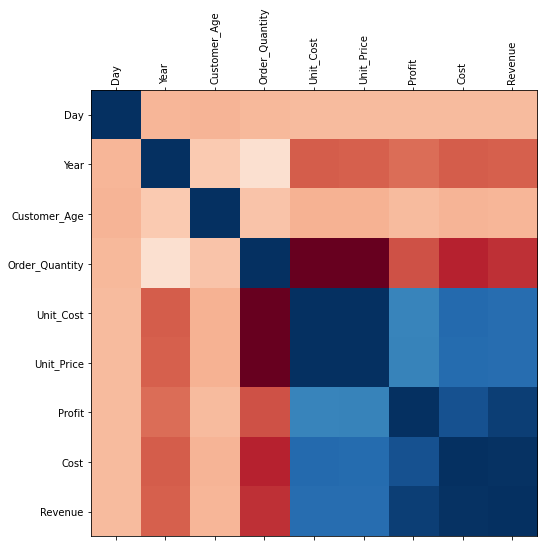

In [29]:
fig = plt.figure(figsize=(8,8))
plt.matshow(corr, cmap='RdBu', fignum=fig.number)
plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr.columns)), corr.columns);

#### Based on heatmap correlation graph, we can conclude variables that have positive correlation are
- Unit_Cost and Unit_Price 
- Profit and Revenue 
- Revenue and Cost

<AxesSubplot:xlabel='Customer_Age', ylabel='Revenue'>

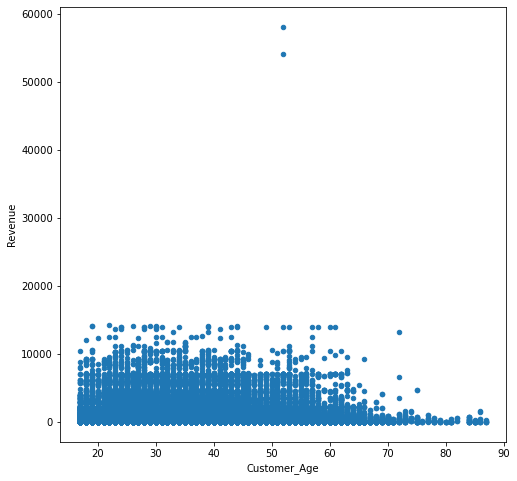

In [31]:
sales.plot(kind='scatter', x ='Customer_Age', y = 'Revenue', figsize=(8,8))

<AxesSubplot:xlabel='Revenue', ylabel='Profit'>

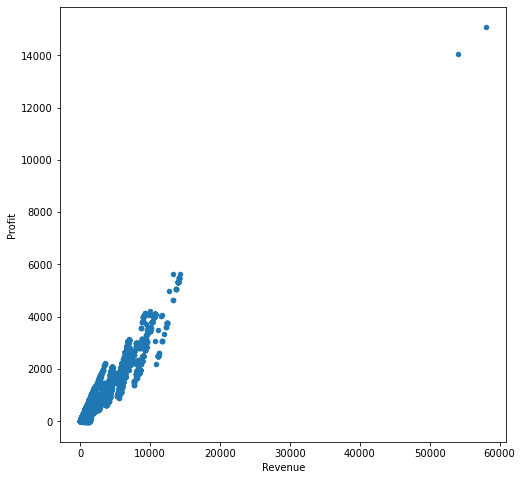

In [33]:
sales.plot(kind='scatter', x = 'Revenue', y = 'Profit', figsize =(8,8))

based on graph above that Revenue and Profit variable have correlation

Text(0, 0.5, 'Profit')

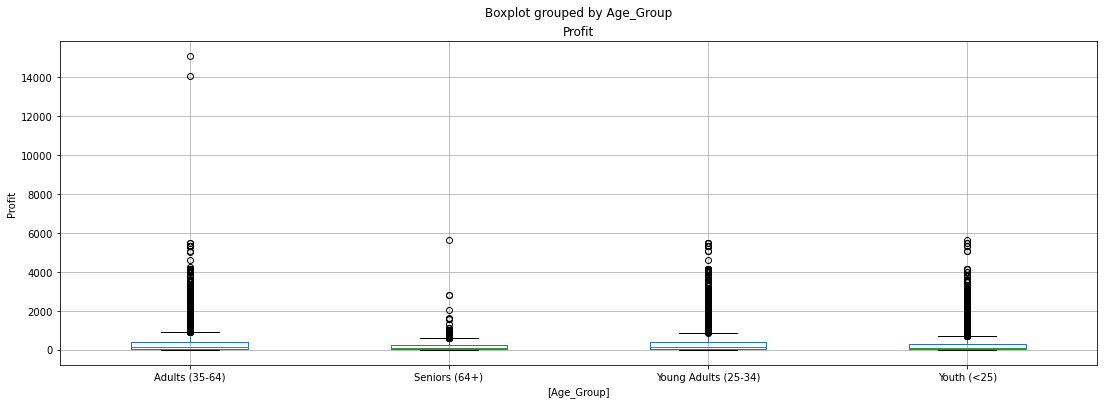

In [35]:
ax = sales[['Profit', 'Age_Group']].boxplot(by='Age_Group', figsize=(18,6))
ax.set_ylabel('Profit')

Based on boxplot above we can see if profit will be change depending of the customer's age

Year                 AxesSubplot(0.125,0.536818;0.227941x0.343182)
Customer_Age      AxesSubplot(0.398529,0.536818;0.227941x0.343182)
Order_Quantity    AxesSubplot(0.672059,0.536818;0.227941x0.343182)
Unit_Cost               AxesSubplot(0.125,0.125;0.227941x0.343182)
Unit_Price           AxesSubplot(0.398529,0.125;0.227941x0.343182)
Profit               AxesSubplot(0.672059,0.125;0.227941x0.343182)
dtype: object

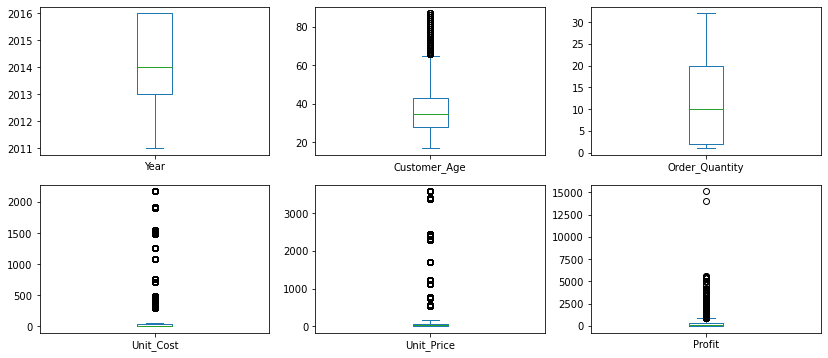

In [37]:
boxplot_cols = ['Year' , 'Customer_Age', 'Order_Quantity', 'Unit_Cost', 'Unit_Price', 'Profit']
sales[boxplot_cols].plot(kind='box', subplots = True, layout = (2,3), figsize=(14,6))

# Column wrangling
Modify /Calculate/ Add new column

Add and calculate a new Revenue_per_Age column

In [38]:
sales['Revenue_per_age'] = sales['Revenue']/sales['Customer_Age']
sales['Revenue_per_age'].head()

0    50.000000
1    50.000000
2    49.000000
3    42.612245
4     8.893617
Name: Revenue_per_age, dtype: float64

<AxesSubplot:ylabel='Density'>

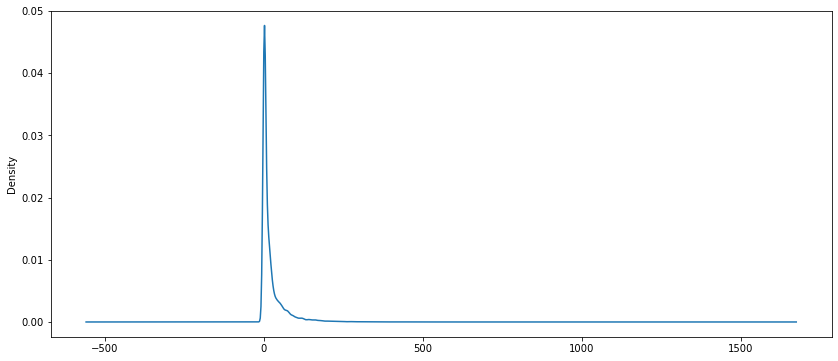

In [39]:
sales['Revenue_per_age'].plot(kind='density', figsize = (14,6))

<AxesSubplot:ylabel='Frequency'>

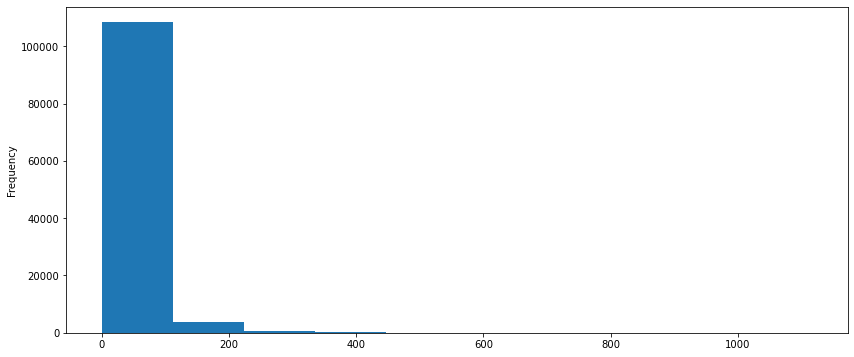

In [40]:
sales['Revenue_per_age'].plot(kind='hist', figsize=(14,6))

Add and calculate ne Calculated_Cost column

In [42]:
sales['Calculated_Cost'] = sales['Order_Quantity']*sales['Unit_Cost']
sales['Calculated_Cost'].head()

0     360
1     360
2    1035
3     900
4     180
Name: Calculated_Cost, dtype: int64

In [43]:
#check how many rows had a different value then what was provided

sales['Calculated_Cost'] != sales['Cost'].sum()

0         True
1         True
2         True
3         True
4         True
          ... 
113031    True
113032    True
113033    True
113034    True
113035    True
Name: Calculated_Cost, Length: 113036, dtype: bool

<AxesSubplot:xlabel='Calculated_Cost', ylabel='Profit'>

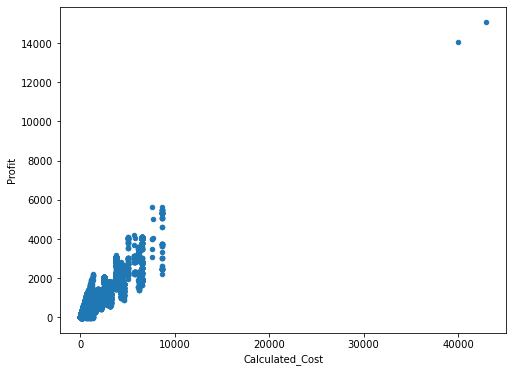

In [45]:
sales.plot(kind='scatter' , x = 'Calculated_Cost', y = 'Profit', figsize=(8,6))

Based on scatterplot above Calculated_Cost has correlation with Profit variable 

Add and calculated a new Calculated_Revenue column

In [50]:
sales['Calculated_Revenue'] = sales['Cost'] * sales['Profit']
sales['Calculated_Revenue'].head()

0     212400
1     212400
2    1413810
3    1069200
4      42840
Name: Calculated_Revenue, dtype: int64

In [51]:
(sales['Calculated_Revenue'] != sales['Revenue']).sum()

112476

In [52]:
sales.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,...,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Revenue_per_age,Calculated_Cost,Calculate_Revenue,Calculated_Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,...,8,45,120,590,360,950,50.000000,360,212400,212400
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,...,8,45,120,590,360,950,50.000000,360,212400,212400
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,...,23,45,120,1366,1035,2401,49.000000,1035,1413810,1413810
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,...,20,45,120,1188,900,2088,42.612245,900,1069200,1069200
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,...,4,45,120,238,180,418,8.893617,180,42840,42840


<AxesSubplot:ylabel='Frequency'>

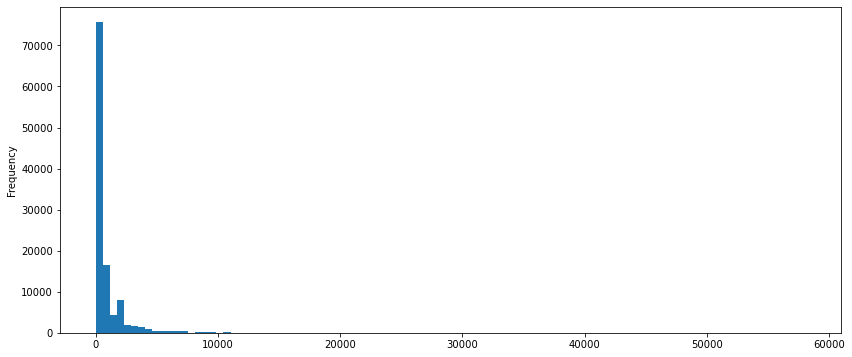

In [54]:
sales['Revenue'].plot(kind='hist', bins = 100, figsize=[14,6] )

 Modify all Unit_Price values adding 3% tax to them

In [55]:
sales['Unit_Price'].head()

0    120
1    120
2    120
3    120
4    120
Name: Unit_Price, dtype: int64

In [56]:
sales['Unit_Price'] *= 1.03
sales['Unit_Price'].head()

0    123.6
1    123.6
2    123.6
3    123.6
4    123.6
Name: Unit_Price, dtype: float64

# Selection & Indexing:

#### Get all the sales made in the state of Kentucky

In [57]:
sales.loc[sales['State'] == 'Kentucky']

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,...,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Revenue_per_age,Calculated_Cost,Calculate_Revenue,Calculated_Revenue
156,2013-11-04,4,November,2013,40,Adults (35-64),M,United States,Kentucky,Accessories,...,1,45,123.60,63,45,108,2.700,45,2835,2835
157,2015-11-04,4,November,2015,40,Adults (35-64),M,United States,Kentucky,Accessories,...,1,45,123.60,63,45,108,2.700,45,2835,2835
23826,2014-04-16,16,April,2014,40,Adults (35-64),M,United States,Kentucky,Accessories,...,12,8,22.66,142,96,238,5.950,96,13632,13632
23827,2016-04-16,16,April,2016,40,Adults (35-64),M,United States,Kentucky,Accessories,...,14,8,22.66,165,112,277,6.925,112,18480,18480
31446,2014-04-16,16,April,2014,40,Adults (35-64),M,United States,Kentucky,Accessories,...,29,13,36.05,537,377,914,22.850,377,202449,202449
31447,2016-04-16,16,April,2016,40,Adults (35-64),M,United States,Kentucky,Accessories,...,31,13,36.05,574,403,977,24.425,403,231322,231322
79670,2014-04-16,16,April,2014,40,Adults (35-64),M,United States,Kentucky,Accessories,...,2,11,30.90,32,22,54,1.350,22,704,704
79671,2014-04-16,16,April,2014,40,Adults (35-64),M,United States,Kentucky,Accessories,...,21,11,30.90,336,231,567,14.175,231,77616,77616
79672,2016-04-16,16,April,2016,40,Adults (35-64),M,United States,Kentucky,Accessories,...,1,11,30.90,16,11,27,0.675,11,176,176
79673,2016-04-16,16,April,2016,40,Adults (35-64),M,United States,Kentucky,Accessories,...,18,11,30.90,288,198,486,12.150,198,57024,57024


#### Get the mean revenue of the Adults (35-64) sales group

In [59]:
sales.loc[sales['Age_Group'] == 'Adults (35-64)', 'Revenue'].mean()

762.8287654055604

#### How many records belong to Age Group Youth (<25) or Adults (35-64)?

In [61]:
sales.loc[(sales['Age_Group'] == 'Youth (<25)') | (sales['Age_Group'] == 'Adults (35-64)')].shape[0]

73652

#### Get the mean revenue of the sales group Adults (35-64) in United States

In [62]:
sales.loc[(sales['Age_Group'] == 'Adults (35-64)') & (sales['Country'] == 'United States'), 'Revenue'].mean()

726.7260473588342

#### Increase the revenue by 10% to every sale made in France

In [63]:
sales.loc[sales['Country'] == 'France', 'Revenue'].head()

50     787
51     787
52    2957
53    2851
60     626
Name: Revenue, dtype: int64

In [65]:
sales.loc[sales['Country'] == 'France', 'Revenue'] *= 1.1

In [67]:
sales.loc[sales['Country'] == 'France', 'Revenue'].head()

50     865.7
51     865.7
52    3252.7
53    3136.1
60     688.6
Name: Revenue, dtype: float64